In [ ]:
%cd '/content/drive/My Drive/ML/CS114.K21.KHTN/Final'

/content/drive/My Drive/ML/CS114.K21.KHTN/Final


#**8. Đánh giá trên bộ dữ liệu test thứ hai**

##**8.1 Import các thư viện cần thiết**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

import joblib
import numpy as np
import os
import cv2
import h5py
from keras import backend as K 
from keras.models import load_model

Using TensorFlow backend.


### **Hàm in ra confusion matrix**

In [ ]:
def plot_confusion_matrix(cls,X,y,
                          target_names=None,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    import itertools
    cm = confusion_matrix(y,cls.predict(X))    
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy
 
    if cmap is None:
        cmap = plt.get_cmap('Blues')
 
    plt.figure(figsize=(15, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### **Class name**

In [ ]:
class_name = ['Apple','Avocado','Banana','Coconut','Custard_apple',
                'Dragon_fruit','Guava','Mango','Orange','Plum',
                'Start_fruit','Watermelon']

### **Load data predict**

In [ ]:
data_predict_path = 'H5PY/predict/data.h5'
labels_predict_path = 'H5PY/predict/labels.h5'

In [ ]:
h5f_test = h5py.File(data_predict_path, 'r')
h5f_labels = h5py.File(labels_predict_path, 'r')

In [ ]:
data = h5f_test['dataset']
labels = h5f_labels['dataset']

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
h5f_test.close()
h5f_labels.close()

In [ ]:
data.shape

(120, 3072)

##**8.2 Model Sklearn (SVM với vector normal)**

In [ ]:
model_path = 'H5PY/model_tuning/svm_tuning_normal.sav'

In [ ]:
model = joblib.load(model_path)

In [ ]:
preds = model.predict(data)

In [ ]:
print(classification_report(labels, preds,
          target_names=class_name ))

               precision    recall  f1-score   support

        Apple       0.50      0.64      0.56        11
      Avocado       0.33      0.10      0.15        10
       Banana       0.26      0.60      0.36        10
      Coconut       0.00      0.00      0.00         9
Custard_apple       0.20      0.10      0.13        10
 Dragon_fruit       0.29      0.50      0.37        10
        Guava       0.09      0.10      0.10        10
        Mango       0.15      0.20      0.17        10
       Orange       0.27      0.30      0.29        10
         Plum       0.50      0.20      0.29        10
  Start_fruit       0.42      0.50      0.45        10
   Watermelon       0.33      0.20      0.25        10

     accuracy                           0.29       120
    macro avg       0.28      0.29      0.26       120
 weighted avg       0.28      0.29      0.27       120



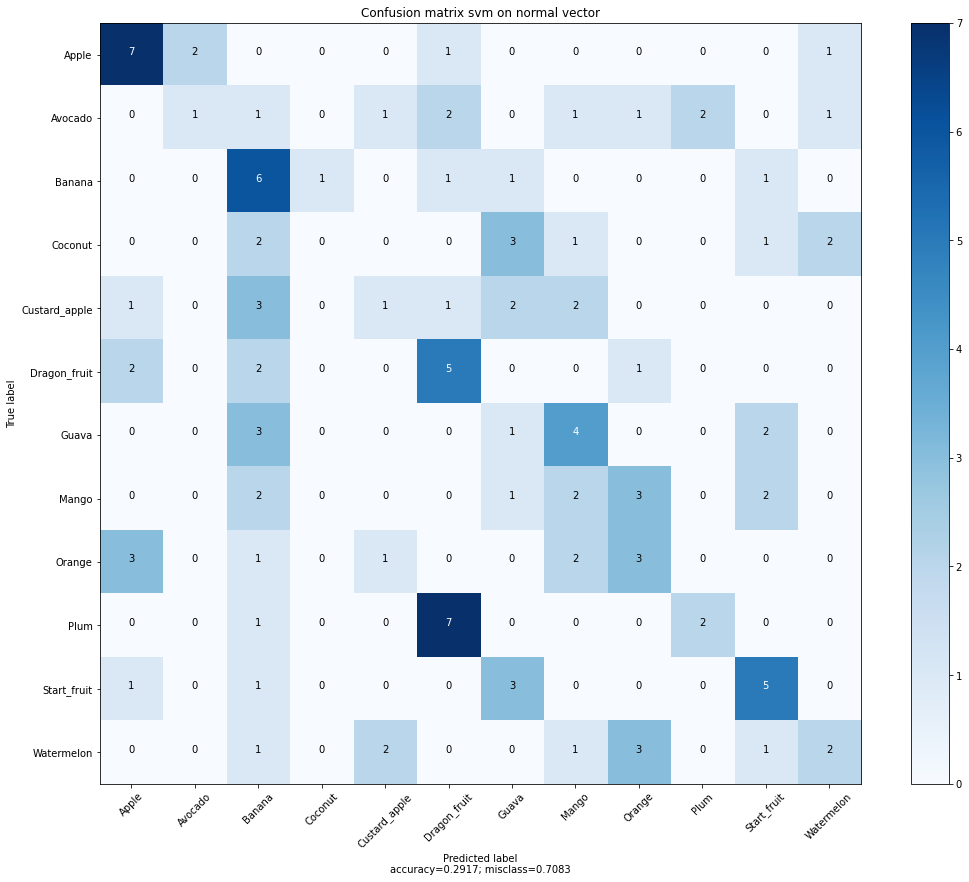

In [ ]:
plot_confusion_matrix(model,data,labels,class_name,title='Confusion matrix svm on normal vector')

##**8.3 Model CNN (Lenet)**

###**8.3.1 Resize vectore sang dạng ma trận (m,n,d)**

In [ ]:
if K.image_data_format() == "channels_first":
    data = data.reshape(data.shape[0],3,32,32)
else:
    data = data.reshape(data.shape[0],32,32,3)

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
model_path_lenet = 'H5PY/model/lenet_weights.hdf5'

In [ ]:
model_lenet = load_model(model_path_lenet)

In [ ]:
preds = model_lenet.predict(data)

In [ ]:
print("[INFO] evaluating network...")
preds = model_lenet.predict(data)
print(classification_report(labels.argmax(axis=1),
                preds.argmax(axis=1),
                target_names=class_name))

[INFO] evaluating network...
               precision    recall  f1-score   support

        Apple       0.71      0.45      0.56        11
      Avocado       0.67      0.20      0.31        10
       Banana       0.25      0.70      0.37        10
      Coconut       0.17      0.11      0.13         9
Custard_apple       0.67      0.20      0.31        10
 Dragon_fruit       0.42      1.00      0.59        10
        Guava       0.25      0.10      0.14        10
        Mango       0.07      0.10      0.08        10
       Orange       0.27      0.40      0.32        10
         Plum       0.00      0.00      0.00        10
  Start_fruit       0.17      0.10      0.12        10
   Watermelon       0.29      0.20      0.24        10

     accuracy                           0.30       120
    macro avg       0.33      0.30      0.26       120
 weighted avg       0.33      0.30      0.27       120

